<center><br><img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 200px;"></center><br>


   <div><center><h1>OH: Trabalho Individual I - Confetaria</h1></center></div>
   <div><center><h3>Optimização Heurística</h3></center></div>
   <div><center><b>Docente:</b> Anabela Costa</center></div>
 <br>
    <div><center> André Filipe Gomes Silvestre Nº104532</center></div>
    <div><center><b>CDB1</b></center>
 <br>


# 
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161));
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>1 | Formulação do Problema de PL por Metas </b></h1></center>
</div>

## Enunciado

Uma Confeitaria está a considerar lançar no mercado três novos doces, **D1**, **D2** e **D3**, para substituir os doces atuais que estão a ser descontinuados. Foi atribuída ao departamento de Operações a tarefa de determinar qual deve ser o nível de produção desses novos produtos.

Atendendo a um estudo de mercado, a produção dos doces **D2** e **D3** tem de ser no mínimo 2 mil e mil quilogramas, respetivamente, enquanto a produção máxima de **D1** é 6 mil quilogramas.

A direção da Confeitaria quer que seja dada uma importância primordial a três fatores: lucro a longo prazo, estabilidade na mão de obra e nível de investimento de capital que seria agora necessário para adquirir novo equipamento. Em particular, a direção estabeleceu as seguintes metas:
     
<ol style="list-style-type: upper-roman;">
    <li style="font-weight:bold"><span style="font-weight:normal">Alcançar um lucro a longo prazo de, pelo menos, 125 mil de euros a partir destes produtos;</span></li>
    <li style="font-weight:bold"><span style="font-weight:normal">Manter o atual nível de mão de obra, ou seja, 60 empregados;</span></li>
    <li style="font-weight:bold"><span style="font-weight:normal">Travar o investimento de capital ao máximo de 55 mil de euros.</span></li>
</ol>

A direção tem consciência que, provavelmente, não será possível atingir todas estas metas, em simultâneo. Pelo que, após refletir, definiu os seguintes pesos de penalização:

- **5 pontos** por cada milhar de euros abaixo do nível de aspiração do lucro;
- <ins>Por cada <b>5 trabalhadores</b></ins>, **4 pontos** por ultrapassar e **10 pontos** por ficar abaixo do valor alvo, que é 60;
- **5 pontos** por cada milhar de euros acima do nível de aspiração do investimento de capital.

A contribuição de cada novo doce para o lucro, mão de obra e nível de investimento de capital é proporcional ao nível de produção. Estas contribuições, por milhar de quilogramas de doce são apresentados na tabela seguinte, juntamente com as metas:

<br>
<center>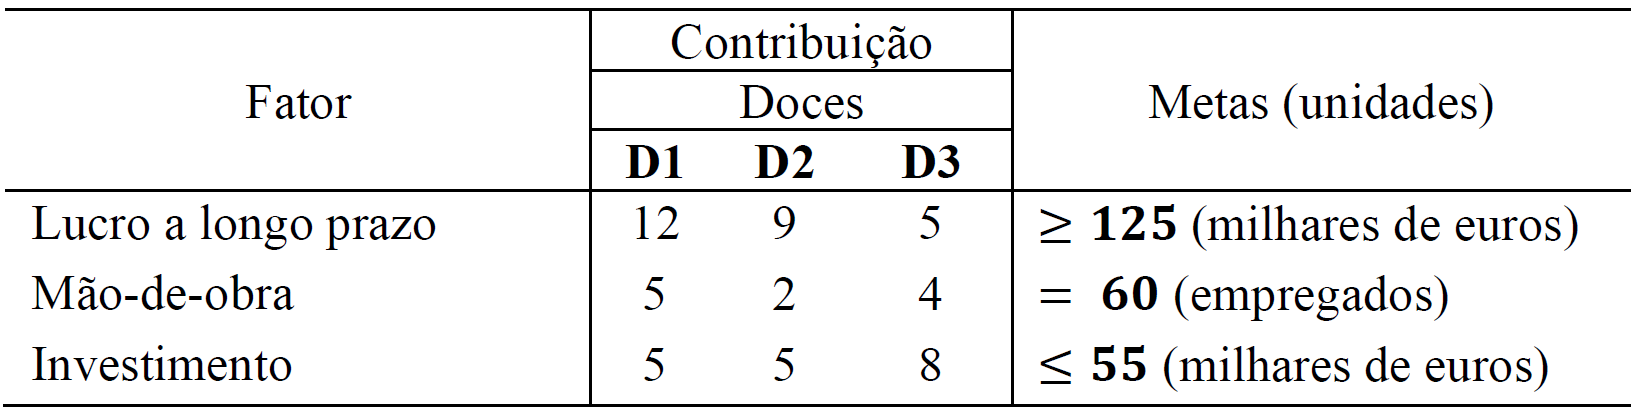</center>

<br>

<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161)); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## Formulação do Problema (`a)`)

**Variáveis de Decisão**
- $x_i \rightarrow$ Quantidade, em toneladas, de **Doce $\bf{i}$** produzido. (com $i = 1,2,3$)

---

**Função Objetivo**
- Face às informações fornecidas o nosso objetivo será minimizar os desvios percentuais ponderados.

---

**Formulação**
$$
\begin{aligned}
& \operatorname{Min} Z=P_1^{-} \frac{d_1^{-}}{t_1}+\frac{P_2^{-} d_2^{-}+P_2^{+} d_2^{+}}{t_2}+P_3^{+} \frac{d_3^{+}}{t_3} =  \\
& \;\;\;\;\;\;\;\;\;\;\;\;\;\; 5 \frac{d_1^{-}}{125} +\frac{\frac{10}{5} d_2^{-}+\frac{4}{5} d_2^{+}}{60}+5 \frac{d_3^{+}}{55}\\
& \\
& \text {s.a. } \\
& \;\;\;\;\;\;\;\;x_1 \leq 6 \\
& \;\;\;\;\;\;\;\;x_2 \geq 2 \\
& \;\;\;\;\;\;\;\;x_3 \geq 1 \\
& \;\;\;\;\;\;\;\;12 x_1+9 x_2+5x_3+d_1^{-} \geq 125 \\
& \;\;\;\;\;\;\;\;5 x_1+2 x_2+4x_3+d_2^{-}-d_2^{+} = 60 \\
& \;\;\;\;\;\;\;\;5 x_1+5 x_2+8x_3-d_3^{+} \leq 55 \\
& \;\;\;\;\;\;\;\;x_i \geq 0, \;\;\; i=1,2,3 \\
& \;\;\;\;\;\;\;\;d_1^{-}, d_2^{-}, d_2^{+}, d_3^{+} \geq 0
\end{aligned}
$$

<br>

## Resolução do Problema em Python

In [1]:
import numpy as np
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK

# Pesos 
vam = np.array([125, 60, 55]) # Valores Alvo Metas
peso = np.array([5, (10/5), (4/5), 5])     # Pesos

# Create the model
model = LpProblem(name="Confeitaria_a", sense=LpMinimize)

# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm = {i: LpVariable(name=f"dm{i}", lowBound=0) for i in range(1, 3)}
dM = {i: LpVariable(name=f"dM{i}", lowBound=0) for i in range(2, 4)}

# Add the constraints to the model
model += (x[1] <= 6, "Restricao_D1")
model += (x[2] >= 2, "Restricao_D2")
model += (x[3] >= 1, "Restricao_D3")
model += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm[1] >= 125, "Meta_Lucro")
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm[2] - dM[2] == 60, "Meta_Emprego")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM[3] <= 55, "Meta_Investimento")

obj_func = (peso[0]/vam[0]) * dm[1] + ((peso[1]/vam[1]) * dm[2] + (peso[2]/vam[1]) * dM[2]) + (peso[3]/vam[2]) * dM[3]
model += obj_func

# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

Confeitaria_a:
MINIMIZE
0.013333333333333334*dM2 + 0.09090909090909091*dM3 + 0.04*dm1 + 0.03333333333333333*dm2 + 0.0
SUBJECT TO
Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

Meta_Lucro: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Meta_Emprego: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Meta_Investimento: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

VARIABLES
dM2 Continuous
dM3 Continuous
dm1 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [2]:
# Solve the problem
status = model.solve(solver=GLPK(msg=True))

# ======================== Outputs ========================

# Valor óptimo de problema
print(f"Valor Ótimo: {model.objective.value()} \n")

# Solução óptima
# Valores óptimos das variáveis de decisão
print("======== Solução Ótima =======")
for var in x.values():
    print(f"{var.name}: {var.value()}")
    
print()
for var in dm.values():
    print(f"{var.name}: {var.value()}")
for var in dM.values():
    print(f"{var.name}: {var.value()}")
    
print()
# Valores das variáveis de desvio
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}")

Valor Ótimo: 1.3359999999999999 

======== Solução Ótima =======
x1: 6.0
x2: 3.4
x3: 1.0

dm1: 17.4
dm2: 19.2
dM2: 0.0
dM3: 0.0

Restricao_D1: 0.0
Restricao_D2: 1.4
Restricao_D3: 0.0
Meta_Lucro: -3.552713678800501e-15
Meta_Emprego: 0.0
Meta_Investimento: 0.0


In [3]:
print("% de investiemnto excedido:", round(17.4/125*100,2))
print("% de mão de obra faltante:", round(19.2/60*100,2))

% de investiemnto excedido: 13.92
% de mão de obra faltante: 32.0


<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161)); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

# 
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161));
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Propostas Alternativas </b></h1></center>
</div>

## Alternativa 1 - Função Objetivo MiniMax 


**Formulação**
$$
\begin{aligned}
& \operatorname{Min} Z=Q
& \\
& \\
& \text {s.a. } \\
& \;\;\;\;\;\;\;\;x_1 \leq 6 \\
& \;\;\;\;\;\;\;\;x_2 \geq 2 \\
& \;\;\;\;\;\;\;\;x_3 \geq 1 \\
& \;\;\;\;\;\;\;\;12 x_1+9 x_2+5x_3+d_1^{-} \geq 125 \\
& \;\;\;\;\;\;\;\;5 x_1+2 x_2+4x_3+d_2^{-}-d_2^{+} = 60 \\
& \;\;\;\;\;\;\;\;5 x_1+5 x_2+8x_3-d_3^{+} \leq 55 \\
& \;\;\;\;\;\;\;\;P_1^{-} \frac{d_1^{-}}{t_1} \leq Q \Longleftrightarrow 5\frac{d_1^-}{125} \\
& \;\;\;\;\;\;\;\;P_2^{-} \frac{d_2^{-}}{t_2} \leq Q \Longleftrightarrow \frac{10}{5}\frac{d_2^-}{60}\\
& \;\;\;\;\;\;\;\;P_2^{+} \frac{d_2^{+}}{t_2} \leq Q \Longleftrightarrow \frac{4}{5}\frac{d_2^+}{60}\\
& \;\;\;\;\;\;\;\;P_3^{+} \frac{d_3^{+}}{t_3} \leq Q \Longleftrightarrow 5\frac{d_3^+}{55}\\
& \;\;\;\;\;\;\;\;x_i \geq 0, \;\;\; i=1,2,3 \\
& \;\;\;\;\;\;\;\;d_1^{-}, d_2^{-}, d_2^{+}, d_3^{+} \geq 0
\end{aligned}
$$

In [4]:
import numpy as np
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK

# Pesos 
vam = np.array([125, 60, 55]) # Valores Alvo Metas
peso = np.array([5, (10/5), (4/5), 5])     # Pesos

# Create the model
model1 = LpProblem(name="Confeitaria_b1", sense=LpMinimize)

# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm = {i: LpVariable(name=f"dm{i}", lowBound=0) for i in range(1, 3)}
dM = {i: LpVariable(name=f"dM{i}", lowBound=0) for i in range(2, 4)}
Q = LpVariable(name=f"Q", lowBound=0)

# Add the constraints to the model
model1 += (x[1] <= 6, "Restricao_D1")
model1 += (x[2] >= 2, "Restricao_D2")
model1 += (x[3] >= 1, "Restricao_D3")
model1 += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm[1] >= 125, "Meta_Lucro")
model1 += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm[2] - dM[2] == 60, "Meta_Emprego")
model1 += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM[3] <= 55, "Meta_Investimento")
model1 += ((peso[0]/vam[0]) * dm[1] <= Q, "Desvio_Q_Lucro_Abaixo")
model1 += ((peso[1]/vam[1]) * dm[2] <= Q, "Desvio_Q_Mao_de_Obra_Abaixo")
model1 += ((peso[2]/vam[1]) * dM[2] <= Q, "Desvio_Q_Mao_de_Obra_Acima")
model1 += ((peso[3]/vam[2]) * dM[3] <= Q, "Desvio_Q_Investimento_Acima")

obj_func = Q
model1 += obj_func

# Formulação (visualização do modelo matemático de forma a conferir os dados)
model1

Confeitaria_b1:
MINIMIZE
1*Q + 0
SUBJECT TO
Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

Meta_Lucro: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Meta_Emprego: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Meta_Investimento: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

Desvio_Q_Lucro_Abaixo: - Q + 0.04 dm1 <= 0

Desvio_Q_Mao_de_Obra_Abaixo: - Q + 0.0333333333333 dm2 <= 0

Desvio_Q_Mao_de_Obra_Acima: - Q + 0.0133333333333 dM2 <= 0

Desvio_Q_Investimento_Acima: - Q + 0.0909090909091 dM3 <= 0

VARIABLES
Q Continuous
dM2 Continuous
dM3 Continuous
dm1 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [5]:
# Solve the problem
status = model1.solve(solver=GLPK(msg=True))

# ======================== Outputs ========================

# Valor óptimo de problema
print(f"Valor Ótimo: {model1.objective.value()} \n")

# Solução óptima
# Valores óptimos das variáveis de decisão
print(" ======== Solução Ótima =======")
for var in x.values():
    print(f"{var.name}: {var.value()}")
    
print()
for var in dm.values():
    print(f"{var.name}: {var.value()}")
for var in dM.values():
    print(f"{var.name}: {var.value()}")
print(f"{Q}: {Q.value()}")
    
print()
# Valores das variáveis de desvio
for name, constraint in model1.constraints.items():
    print (f"{name}: ~{round(constraint.value(),3)}")

Valor Ótimo: 0.541203 

 ======== Solução Ótima =======
x1: 6.0
x2: 3.42539
x3: 1.72829

dm1: 13.5301
dm2: 16.2361
dM2: 0.0
dM3: 5.95323
Q: 0.541203

Restricao_D1: ~0.0
Restricao_D2: ~1.425
Restricao_D3: ~0.728
Meta_Lucro: ~0.0
Meta_Emprego: ~0.0
Meta_Investimento: ~0.0
Desvio_Q_Lucro_Abaixo: ~0.0
Desvio_Q_Mao_de_Obra_Abaixo: ~0.0
Desvio_Q_Mao_de_Obra_Acima: ~-0.541
Desvio_Q_Investimento_Acima: ~-0.0


<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161)); 
            padding: 3px; color: white; border-radius: 300px; text-align: center;">
</div>

## Alternativa 2 - Pesos Diferentes

- A formulação é a mesma que em **`a)`**, mas com pesos diferentes

> Para tal resolvi várias tentativas com pesos diferentes, sendo que os resultados que apresetaram valores/soluções ótimas distintas foram

<br>
<center>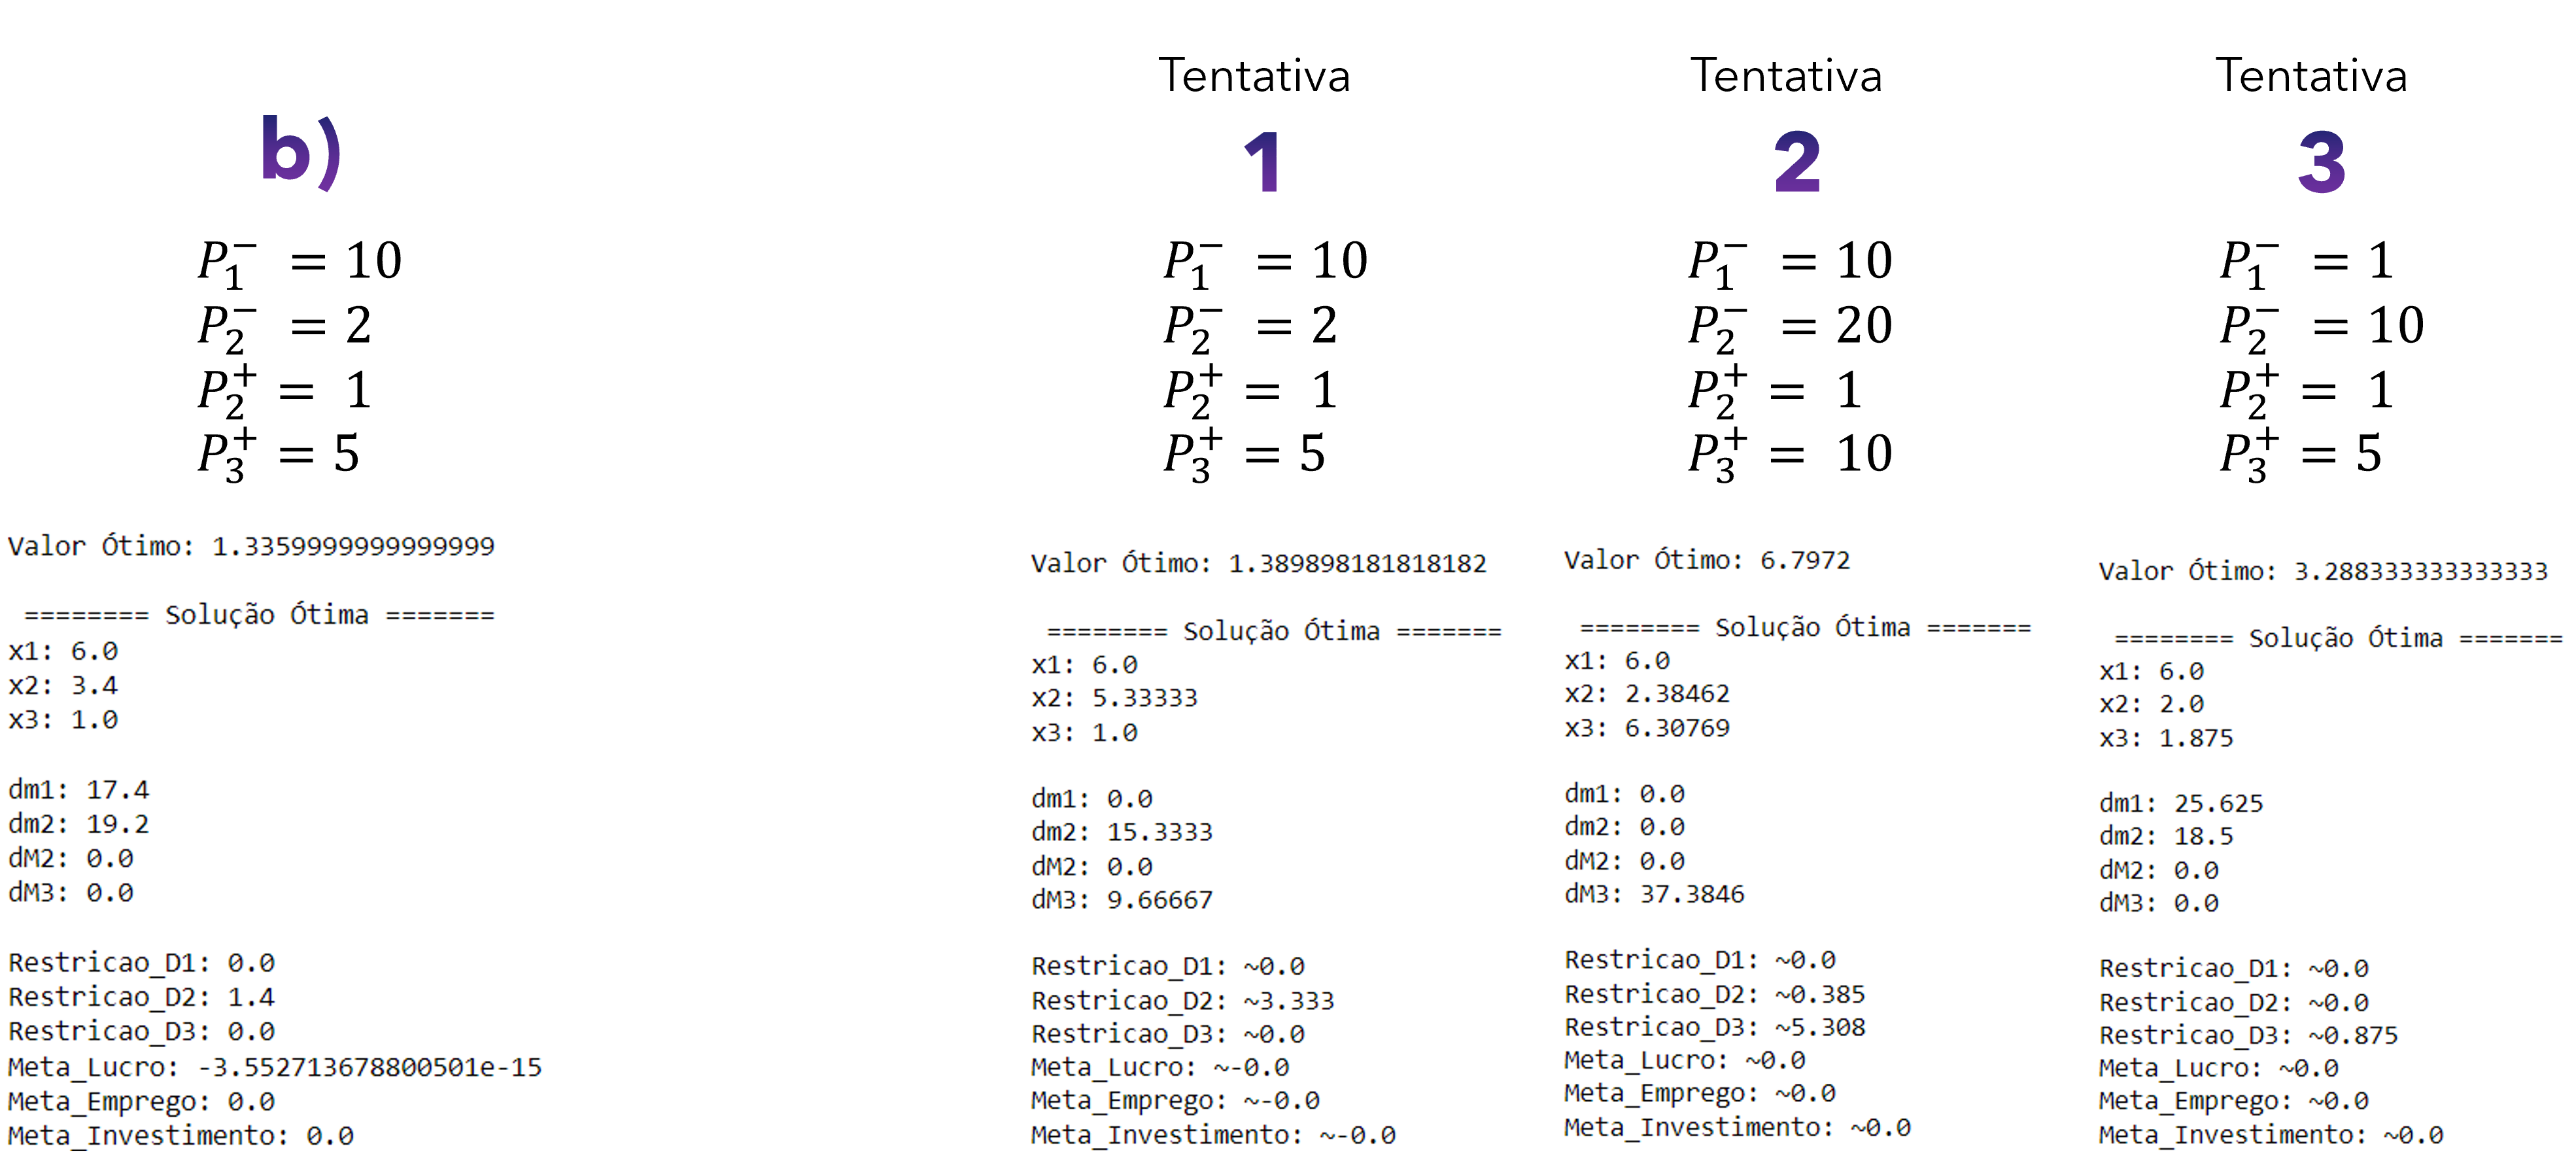</center><br>

> Analisando os resultados, a combinação de pesos que, a meu ver, o Agente Decisor iria preferir seria a **2º Tentativa** dado que apenas teria de desrespeitar o objetivo da **Meta 3**.

> Na **1º**, comparativamente com as restantes, cumpre o lucro a longo prazo, tem um melhor desvio para a mão de obra e teria apenas de investir mais $\approx9700€$ do que o previsto. Porém é a mesma solução da **Alternativa 1** com a f.o. $MiniMax$.

Assim, ficará a **2ª Tentativa** como **Alternativa 2** que apresentarei no relatório.


---



### Resolução com os Pesos $P_1^- =10$ , $P_2^-= 20$, $P_2^+ = 1$ e  $P_3^+ = 10$

**Formulação**
$$
\begin{aligned}
& \operatorname{Min} Z=P_1^{-} \frac{d_1^{-}}{t_1}+\frac{P_2^{-} d_2^{-}+P_2^{+} d_2^{+}}{t_2}+P_3^{+} \frac{d_3^{+}}{t_3} =  \\
& \;\;\;\;\;\;\;\;\;\;\;\;\;\; 10 \frac{d_1^{-}}{125} +\frac{20\; d_2^{-}+ d_2^{+}}{60}+10 \frac{d_3^{+}}{55}\\
& \\
& \text {s.a. } \\
& \;\;\;\;\;\;\;\;x_1 \leq 6 \\
& \;\;\;\;\;\;\;\;x_2 \geq 2 \\
& \;\;\;\;\;\;\;\;x_3 \geq 1 \\
& \;\;\;\;\;\;\;\;12 x_1+9 x_2+5x_3+d_1^{-} \geq 125 \\
& \;\;\;\;\;\;\;\;5 x_1+2 x_2+4x_3+d_2^{-}-d_2^{+} = 60 \\
& \;\;\;\;\;\;\;\;5 x_1+5 x_2+8x_3-d_3^{+} \leq 55 \\
& \;\;\;\;\;\;\;\;x_i \geq 0, \;\;\; i=1,2,3 \\
& \;\;\;\;\;\;\;\;d_1^{-}, d_2^{-}, d_2^{+}, d_3^{+} \geq 0
\end{aligned}
$$

In [6]:
import numpy as np
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK

# Pesos 
vam = np.array([125, 60, 55]) # Valores Alvo Metas
peso = np.array([10, 20, 1, 10])     # Pesos

# Create the model
model2 = LpProblem(name="Confeitaria_b2", sense=LpMinimize)

# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm = {i: LpVariable(name=f"dm{i}", lowBound=0) for i in range(1, 3)}
dM = {i: LpVariable(name=f"dM{i}", lowBound=0) for i in range(2, 4)}

# Add the constraints to the model
model2 += (x[1] <= 6, "Restricao_D1")
model2 += (x[2] >= 2, "Restricao_D2")
model2 += (x[3] >= 1, "Restricao_D3")
model2 += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm[1] >= 125, "Meta_Lucro")
model2 += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm[2] - dM[2] == 60, "Meta_Emprego")
model2 += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM[3] <= 55, "Meta_Investimento")

obj_func = (peso[0]/vam[0]) * dm[1] + ((peso[1]/vam[1]) * dm[2] + (peso[2]/vam[1]) * dM[2]) + (peso[3]/vam[2]) * dM[3]
model2 += obj_func

# Formulação (visualização do modelo matemático de forma a conferir os dados)
model2

Confeitaria_b2:
MINIMIZE
0.016666666666666666*dM2 + 0.18181818181818182*dM3 + 0.08*dm1 + 0.3333333333333333*dm2 + 0.0
SUBJECT TO
Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

Meta_Lucro: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Meta_Emprego: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Meta_Investimento: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

VARIABLES
dM2 Continuous
dM3 Continuous
dm1 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161)); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

> Os pesos de $d_1^-$, $d_2^+$, $d_2^-$ foram aumentados, transformando estes objetivos em constrangimento **mais rígido**; já o peso de $d_3^+$ foi baixado, resultando numa restrição **mais suave**.

> Assim, esta solução dará mais relevância à **Meta 1** e **Meta 2** que não foram atingidas no problema inicial. 

<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161)); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

In [7]:
# Solve the problem
status = model2.solve(solver=GLPK(msg=True))

# ======================== Outputs ========================

# Valor óptimo de problema
print(f"Valor Ótimo: {model2.objective.value()} \n")

# Solução óptima
# Valores óptimos das variáveis de decisão
print("======== Solução Ótima =======")
for var in x.values():
    print(f"{var.name}: {var.value()}")
    
print()
for var in dm.values():
    print(f"{var.name}: {var.value()}")
for var in dM.values():
    print(f"{var.name}: {var.value()}")
    
print()
# Valores das variáveis de desvio
for name, constraint in model2.constraints.items():
    print (f"{name}: ~{round(constraint.value(),3)}")

Valor Ótimo: 6.7972 

======== Solução Ótima =======
x1: 6.0
x2: 2.38462
x3: 6.30769

dm1: 0.0
dm2: 0.0
dM2: 0.0
dM3: 37.3846

Restricao_D1: ~0.0
Restricao_D2: ~0.385
Restricao_D3: ~5.308
Meta_Lucro: ~0.0
Meta_Emprego: ~0.0
Meta_Investimento: ~0.0


<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161)); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

<div style="border: 3px rgb(9, 9, 121); border-style: solid;  
            border-radius: 300px; padding: 20px;">
    <center><h1 style="margin-top: 2px;color: rgb(9, 9, 121); font-size: 20px;
                       font-family: 'Avenir Next LT Pro', sans-serif;"> Alínea D)</h1></center>
</div>

In [8]:
# Compare os planos de produção obtidos em b) e c) relativamente às três metasdefinidas pela direção da Confeitaria. 
# Existem planos de produção dominados?
def alinea_d(x1,x2,x3):
    print('Meta1 Lucro a Longo Prazo',12*x1+9*x2+5*x3, 'milhares de €')
    print('Meta2 Mão de Obra',5*x1+2*x2+4*x3, 'empregados')
    print('Meta3 Investimento',5*x1+5*x2+8*x3, 'milhares de €')

print('Modelo B):')
alinea_d(6.0,3.4,1.0)
print('\nModelo C1):')
alinea_d(6.0,3.42539,1.72829)
print('\nModelo C2):')
alinea_d(6.0,2.38462,6.30769)

Modelo B):
Meta1 Lucro a Longo Prazo 107.6 milhares de €
Meta2 Mão de Obra 40.8 empregados
Meta3 Investimento 55.0 milhares de €

Modelo C1):
Meta1 Lucro a Longo Prazo 111.46996 milhares de €
Meta2 Mão de Obra 43.76394 empregados
Meta3 Investimento 60.95327 milhares de €

Modelo C2):
Meta1 Lucro a Longo Prazo 125.00003 milhares de €
Meta2 Mão de Obra 60.0 empregados
Meta3 Investimento 92.38462 milhares de €


<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161)); 
            padding: 1.3px; color: white; border-radius: 300px; text-align: center;">
</div>

# 
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(109.6deg, rgb(9, 9, 121), rgb(144, 6, 161));
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Programação por Metas Preemptiva</b></h1></center>
</div>


<br>

A direção da Confeitaria reavaliou os níveis de importância atribuídos a cada uma das três metas. Em consequência, foi decidido dar uma prioridade muito elevada à meta relativa à mão de obra. Além disso, a direção constatou que angariar mais de 55 milhões de euros para investimento de capital em equipamentos seria extremamente difícil, pelo que também decidiu atribuir uma prioridade muito elevada à meta do investimento de capital.

A informação acima referida encontra-se sintetizada na tabela seguinte:

<br>
<center>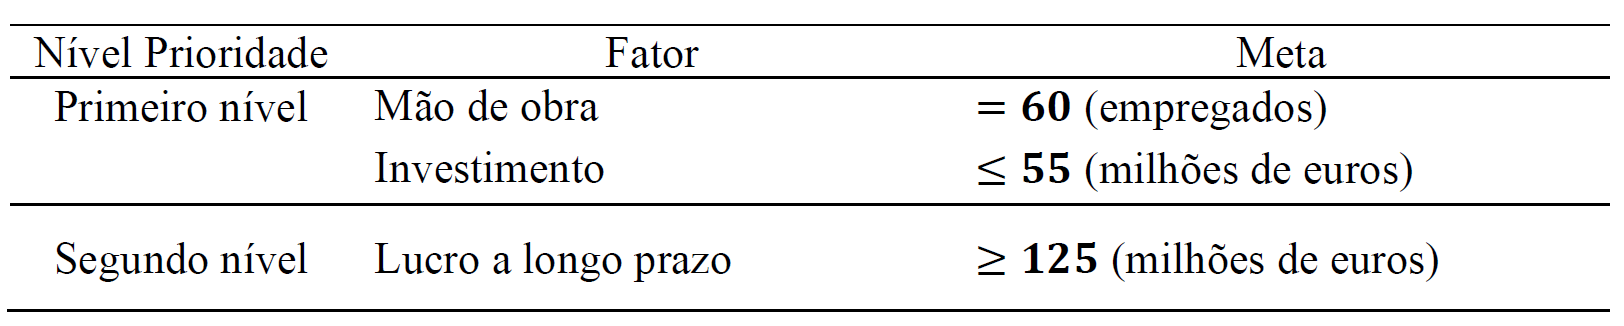</center>
<br>

> Sob esta **Política de Prioridades**, apresente uma proposta para o nível de produção dos doces **D1**, **D2** e **D3**? 

- Interprete a solução obtida, nomeadamente no que às metas diz respeito.

<br>

---

**\(*)** Depois de confirmar com a docente, utilizei os valores como **milhares de €**, tal como os referifos na alínea **a)** .

---

## Passos

- **$\textbf{Passo 0.}\rightarrow$** Atribuição de valores aos **Pesos** (mantive os da alínea `a)`- $P_1^- =5$ , $P_2^-= \frac{10}{5}$, $P_2^+ = \frac{4}{5}$ e  $P_3^+ = 5$)

- **$\textbf{Passo 1.}\rightarrow$** Contrução e Resolução do problema relativo à meta do **1º Nível de Prioridade** em que se considera apenas a função objectivo, as restrições hard e as restrições do **Nível 1**, ou seja, o prioritário:

$$Lex\;Min\;Z=\left\{\frac{P_2^-d_2^-+P_2^+d_2^+}{t_2}+P_3^+\frac{d_3^+}{t_3},\; P_1^-\frac{d_1^-}{t_1}\right\}$$

<br>

## Formulação do Modelo para o 1º Nível de Prioridade


$$
\begin{aligned}
& \\
& \operatorname{Min} Z=\frac{P_2^{-} d_2^{-}+P_2^{+} d_2^{+}}{t_2}+P_3^{+} \frac{d_3^{+}}{t_3} =  \\
& \;\;\;\;\;\;\;\;\;\;\;\;\;\; \frac{\frac{10}{5} d_2^{-}+\frac{4}{5} d_2^{+}}{60}+5 \frac{d_3^{+}}{55}\\
& \\
& \text {s.a. } \\
& \;\;\;\;\;\;\;\;x_1 \leq 6 \\
& \;\;\;\;\;\;\;\;x_2 \geq 2 \\
& \;\;\;\;\;\;\;\;x_3 \geq 1 \\
& \;\;\;\;\;\;\;\;5 x_1+2 x_2+4x_3+d_2^{-}-d_2^{+} = 60 \\
& \;\;\;\;\;\;\;\;5 x_1+5 x_2+8x_3-d_3^{+} \leq 55 \\
& \;\;\;\;\;\;\;\;x_i \geq 0, \;\;\; i=1,2,3 \\
& \;\;\;\;\;\;\;\;d_2^{-}, d_2^{+}, d_3^{+} \geq 0
\end{aligned}
$$

<br>

In [9]:
import numpy as np
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK

# Pesos 
vam = np.array([125, 60, 55]) # Valores Alvo das Metas
peso = np.array([5, (10/5), (4/5), 5]) 

# Create the model
model_1 = LpProblem(name="Confeitaria_c1", sense=LpMinimize)

# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm = {i: LpVariable(name=f"dm{i}", lowBound=0) for i in range(2, 3)}
dM = {i: LpVariable(name=f"dM{i}", lowBound=0) for i in range(2, 4)}

# Add the constraints to the model
model_1 += (x[1] <= 6, "Restricao_D1")
model_1 += (x[2] >= 2, "Restricao_D2")
model_1 += (x[3] >= 1, "Restricao_D3")
model_1 += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm[2] - dM[2] == 60, "Meta_Emprego")
model_1 += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM[3] <= 55, "Meta_Investimento")

obj_func = ((peso[1]/vam[1]) * dm[2] + (peso[2]/vam[1]) * dM[2]) + (peso[3]/vam[2]) * dM[3]
model_1 += obj_func

# Formulação (visualização do modelo matemático de forma a conferir os dados)
model_1

Confeitaria_c1:
MINIMIZE
0.013333333333333334*dM2 + 0.09090909090909091*dM3 + 0.03333333333333333*dm2 + 0.0
SUBJECT TO
Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

Meta_Emprego: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Meta_Investimento: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

VARIABLES
dM2 Continuous
dM3 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [10]:
# Solve the problem
status = model_1.solve(solver=GLPK(msg=True))

# ======================== Outputs ========================

# Valor óptimo de problema
print(f"Valor Ótimo: {model_1.objective.value()} \n")

# Solução óptima
# Valores óptimos das variáveis de decisão
print("======== Solução Ótima =======")
for var in x.values():
    print(f"{var.name}: {var.value()}")
    
print()
for var in dm.values():
    print(f"{var.name}: {var.value()}")
for var in dM.values():
    print(f"{var.name}: {var.value()}")
    
print()
# Valores das variáveis de desvio
for name, constraint in model_1.constraints.items():
    print (f"{name}: {constraint.value()}")

Valor Ótimo: 0.6166666666666667 

======== Solução Ótima =======
x1: 6.0
x2: 2.0
x3: 1.875

dm2: 18.5
dM2: 0.0
dM3: 0.0

Restricao_D1: 0.0
Restricao_D2: 0.0
Restricao_D3: 0.875
Meta_Emprego: 0.0
Meta_Investimento: 0.0


> Como $Z^*\neq 0$ e $d^-_2 = 18.5$, conclui-se que não é possível cumprir a **Meta 2** do primeiro nível de prioridade (isto é, a confeitaria não conseguirá ter $60$ empregados e um investimento inferior a $55 mil €$ em simultâneo).

> Assim teremos de renegociar este valor de referência para $60 - 18.5 = \textbf{41.5 empregados}$.

---

<br>

In [11]:
import numpy as np
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK

# Pesos 
vam = np.array([125, 60, 55]) # Valores Alvo Metas
peso = np.array([5, (10/5), (4/5), 5]) 

# Create the model
model_1_ = LpProblem(name="Confeitaria_c1", sense=LpMinimize)

# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm = {i: LpVariable(name=f"dm{i}", lowBound=0) for i in range(2, 3)}
dM = {i: LpVariable(name=f"dM{i}", lowBound=0) for i in range(2, 4)}

# Add the constraints to the model
model_1_ += (x[1] <= 6, "Restricao_D1")
model_1_ += (x[2] >= 2, "Restricao_D2")
model_1_ += (x[3] >= 1, "Restricao_D3")
model_1_ += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm[2] - dM[2] == 41, "Meta_Emprego")
model_1_ += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM[3] <= 55, "Meta_Investimento")

obj_func = ((peso[1]/vam[1]) * dm[2] + (peso[2]/vam[1]) * dM[2]) + (peso[3]/vam[2]) * dM[3]
model_1_ += obj_func

# Formulação (visualização do modelo matemático de forma a conferir os dados)
model_1_

Confeitaria_c1:
MINIMIZE
0.013333333333333334*dM2 + 0.09090909090909091*dM3 + 0.03333333333333333*dm2 + 0.0
SUBJECT TO
Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

Meta_Emprego: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 41

Meta_Investimento: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

VARIABLES
dM2 Continuous
dM3 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [12]:
# Solve the problem
status = model_1_.solve(solver=GLPK(msg=True))

# ======================== Outputs ========================

# Valor óptimo de problema
print(f"Valor Ótimo: {model_1_.objective.value()} \n")

# Solução óptima
# Valores óptimos das variáveis de decisão
print("======== Solução Ótima =======")
for var in x.values():
    print(f"{var.name}: {var.value()}")
    
print("")
for var in dm.values():
    print(f"{var.name}: {var.value()}")
for var in dM.values():
    print(f"{var.name}: {var.value()}")
    
print("")
# Valores das variáveis de desvio
for name, constraint in model_1_.constraints.items():
    print (f"{name}: {constraint.value()}")

Valor Ótimo: 0.0 

======== Solução Ótima =======
x1: 6.0
x2: 2.0
x3: 1.75

dm2: 0.0
dM2: 0.0
dM3: 0.0

Restricao_D1: 0.0
Restricao_D2: 0.0
Restricao_D3: 0.75
Meta_Emprego: 0.0
Meta_Investimento: -1.0


- **$\textbf{Passo 2.}\rightarrow$** Construir e Resolver um novo modelo, que inclua como objectivo as metas do **Nível Prioritário 2** e que nas restrições incorpore a solução obtida no $\textbf{Passo1}$, bem como, as restrições *hard* e as restrições do nível 2:

<br>


## Formulação do Modelo para o 2º Nível de Prioridade


$$
\begin{aligned}
& \operatorname{Min} Z=P_1^{-} \frac{d_1^{-}}{t_1} = 10 \frac{d_1^{-}}{125}\\
& \\
& \text {s.a. } \\
& \;\;\;\;\;\;\;\;x_1 \leq 6 \\
& \;\;\;\;\;\;\;\;x_2 \geq 2 \\
& \;\;\;\;\;\;\;\;x_3 \geq 1 \\
& \;\;\;\;\;\;\;\;12 x_1+9 x_2+5x_3+d_1^{-} \geq 125 \\
& \\
& \;\;\;\;\;\;\;\;5 x_1+2 x_2+4x_3+d_2^{-}-d_2^{+} = 41.5 \\
& \;\;\;\;\;\;\;\; d_2^{-} = 0\\
& \;\;\;\;\;\;\;\; d_2^{+} = 0\\
& \;\;\;\;\;\;\;\;5 x_1+5 x_2+8x_3-d_3^{+} \leq 55 \\
& \;\;\;\;\;\;\;\; d_3^{+} = 0\\
& \\
& \;\;\;\;\;\;\;\;x_i \geq 0, \;\;\; i=1,2,3 \\
& \;\;\;\;\;\;\;\;d_1^{-} \geq 0
\end{aligned}
$$

---

In [13]:
import numpy as np
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK

# Pesos 
vam = np.array([125]) # Valores Alvo Metas
peso = np.array([5, (10/5), (4/5), 5])     # Pesos

# Create the model
model_2 = LpProblem(name="Confeitaria_c2", sense=LpMinimize)

# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm = {i: LpVariable(name=f"dm{i}", lowBound=0) for i in range(1, 2)}

# Add the constraints to the model
model_2 += (x[1] <= 6, "Restricao_D1")
model_2 += (x[2] >= 2, "Restricao_D2")
model_2 += (x[3] >= 1, "Restricao_D3")
model_2 += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm[1] >= 125, "Meta_Lucro")

model_2 += (5 * x[1] + 2 * x[2] + 4 * x[3] == 41, "Primeiro_Nivel_Prioridade_Meta_Emprego")
model_2 += (5 * x[1] + 5 * x[2] + 8 * x[3] == 55, "Primeiro_Nivel_Prioridade_Meta_Investimento")

obj_func = (peso[0]/vam[0]) * dm[1]
model_2 += obj_func

# Formulação (visualização do modelo matemático de forma a conferir os dados)
model_2

Confeitaria_c2:
MINIMIZE
0.04*dm1 + 0.0
SUBJECT TO
Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

Meta_Lucro: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Primeiro_Nivel_Prioridade_Meta_Emprego: 5 x1 + 2 x2 + 4 x3 = 41

Primeiro_Nivel_Prioridade_Meta_Investimento: 5 x1 + 5 x2 + 8 x3 = 55

VARIABLES
dm1 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [14]:
# Solve the problem
status = model_2.solve(solver=GLPK(msg=True))

# ======================== Outputs ========================

# Valor óptimo de problema
print(f"Valor Ótimo: {model_2.objective.value()} \n")

# Solução óptima
# Valores óptimos das variáveis de decisão
print("======== Solução Ótima =======")
for var in x.values():
    print(f"{var.name}: {var.value()}")
    
print()
for var in dm.values():
    print(f"{var.name}: {var.value()}")

print()
# Valores das variáveis de desvio
for name, constraint in model_2.constraints.items():
    print (f"{name}: {constraint.value()}")

Valor Ótimo: 0.79 

======== Solução Ótima =======
x1: 6.0
x2: 3.0
x3: 1.25

dm1: 19.75

Restricao_D1: 0.0
Restricao_D2: 1.0
Restricao_D3: 0.25
Meta_Lucro: 0.0
Primeiro_Nivel_Prioridade_Meta_Emprego: 0.0
Primeiro_Nivel_Prioridade_Meta_Investimento: 0.0


---

> Redefinindo o lucro para o valor $125 - 19.75 = \textbf{105.25 milhares €}$, verificamos se o **2º Nível** ficaria cumprido.

In [15]:
import numpy as np
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK

# Pesos 
vam = np.array([105.25]) # Valores Alvo Metas
peso = np.array([5, (10/5), (4/5), 5])     # Pesos

# Create the model
model_2_ = LpProblem(name="Confeitaria_c2_confirmacao", sense=LpMinimize)

# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm = {i: LpVariable(name=f"dm{i}", lowBound=0) for i in range(1, 2)}

# Add the constraints to the model
model_2_ += (x[1] <= 6, "Restricao_D1")
model_2_ += (x[2] >= 2, "Restricao_D2")
model_2_ += (x[3] >= 1, "Restricao_D3")
model_2_ += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm[1] >= 105.25, "Meta_Lucro")

model_2_ += (5 * x[1] + 2 * x[2] + 4 * x[3] == 41, "Primeiro_Nivel_Prioridade_Meta_Emprego")
model_2_ += (5 * x[1] + 5 * x[2] + 8 * x[3] == 55, "Primeiro_Nivel_Prioridade_Meta_Investimento")

obj_func = (peso[0]/vam[0]) * dm[1] 
model_2_ += obj_func

# Formulação (visualização do modelo matemático de forma a conferir os dados)
model_2_

Confeitaria_c2_confirmacao:
MINIMIZE
0.047505938242280284*dm1 + 0.0
SUBJECT TO
Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

Meta_Lucro: dm1 + 12 x1 + 9 x2 + 5 x3 >= 105.25

Primeiro_Nivel_Prioridade_Meta_Emprego: 5 x1 + 2 x2 + 4 x3 = 41

Primeiro_Nivel_Prioridade_Meta_Investimento: 5 x1 + 5 x2 + 8 x3 = 55

VARIABLES
dm1 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [16]:
# Solve the problem
status = model_2_.solve(solver=GLPK(msg=True))

# ======================== Outputs ========================

# Valor óptimo de problema
print(f"Valor Ótimo: {model_2_.objective.value()} \n")

# Solução óptima
# Valores óptimos das variáveis de decisão
print("======== Solução Ótima =======")
for var in x.values():
    print(f"{var.name}: {var.value()}")
    
print()
for var in dm.values():
    print(f"{var.name}: {var.value()}")

print()
# Valores das variáveis de desvio
for name, constraint in model_2_.constraints.items():
    print (f"{name}: ~{round(constraint.value(),3)}")

Valor Ótimo: 0.0 

======== Solução Ótima =======
x1: 6.0
x2: 3.0
x3: 1.25

dm1: 0.0

Restricao_D1: ~0.0
Restricao_D2: ~1.0
Restricao_D3: ~0.25
Meta_Lucro: ~0.0
Primeiro_Nivel_Prioridade_Meta_Emprego: ~0.0
Primeiro_Nivel_Prioridade_Meta_Investimento: ~0.0


---